In [11]:
# !pip install opencv-python

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def crop_brain_contour(image, plot=False):
    # Convert the image to grayscale and apply slight blurring
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Threshold the image and perform erosion and dilation to remove noise
    thresh = cv2.threshold(blurred, 45, 255, cv2.THRESH_BINARY)[1]
    eroded = cv2.erode(thresh, None, iterations=2)
    dilated = cv2.dilate(eroded, None, iterations=2)

    # Find contours and select the largest one (brain contour)
    contours, _ = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    brain_contour = max(contours, key=cv2.contourArea)

    # Find the extreme points of the brain contour
    leftmost = tuple(brain_contour[brain_contour[:, :, 0].argmin()][0])
    rightmost = tuple(brain_contour[brain_contour[:, :, 0].argmax()][0])
    topmost = tuple(brain_contour[brain_contour[:, :, 1].argmin()][0])
    bottommost = tuple(brain_contour[brain_contour[:, :, 1].argmax()][0])

    # Crop the image based on the extreme points
    cropped_image = image[topmost[1]:bottommost[1], leftmost[0]:rightmost[0]]

    if plot:
        # Display the original and cropped images side by side
        fig, axes = plt.subplots(1, 2, figsize=(10, 5))
        axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        axes[0].set_title('Original Image')
        axes[0].axis('off')
        axes[1].imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
        axes[1].set_title('Cropped Image')
        axes[1].axis('off')
        plt.show()

    return cropped_image

In [7]:
import os
import shutil

# Parent folder containing the tumor type folders
parent_folder = r'C:\Users\JAMES\OneDrive\Desktop\ProcessedImages'

# List of tumor type folders
tumor_type_folders = ['glioma', 'meningioma', 'pituitary']

# Output folder to save the cropped images
output_folder = r'C:\Users\JAMES\OneDrive\Desktop\cropped_images'

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Iterate over the tumor type folders
for tumor_folder in tumor_type_folders:
    # Path to the current tumor type folder
    folder_path = os.path.join(parent_folder, tumor_folder)

    # Get a list of image files in the folder
    image_files = os.listdir(folder_path)

    # Create the tumor type folder inside the output folder
    output_tumor_folder = os.path.join(output_folder, tumor_folder)
    os.makedirs(output_tumor_folder, exist_ok=True)

    # Iterate over the image files
    for image_file in image_files:
        # Check if the file is an image (you can modify this condition as per your image file extensions)
        if image_file.endswith('.jpg'):
            # Load the image
            image_path = os.path.join(folder_path, image_file)
            image = cv2.imread(image_path)

            # Call the crop_brain_contour function
            cropped_image = crop_brain_contour(image, plot=True)

            # Save the cropped image to a temporary path
            temp_path = os.path.join(output_tumor_folder, 'cropped_temp.jpg')
            cv2.imwrite(temp_path, cropped_image)

            # Move the cropped image to the output folder using shutil
            output_path = os.path.join(output_tumor_folder, image_file)
            shutil.move(temp_path, output_path)
            print(f"Image saved successfully: {output_path}")


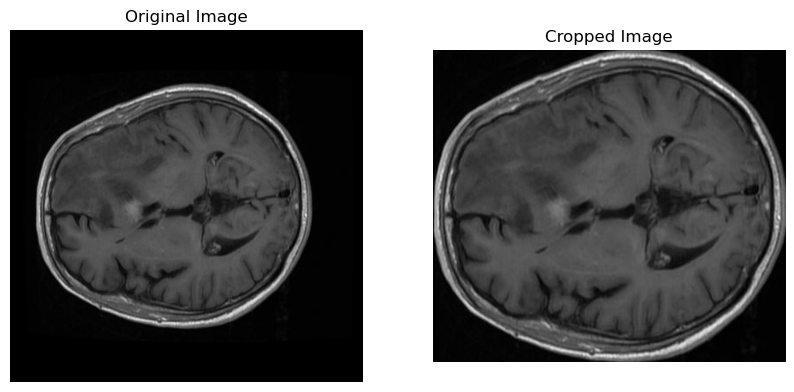

In [5]:
# Load an image
image = cv2.imread(r'C:\Users\JAMES\Downloads\ProcessedImages\glioma\209_glioma.jpg')

# Crop the brain contour
cropped_image = crop_brain_contour(image, plot=True)